In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

def ackley_function(x):
    return -exp(-sqrt(0.5*sum([i**2 for i in x]))) - exp(0.5*sum([cos(i) for i in x])) + 1 + exp(1)

def sphere_function(x):
    return sum([i**2 for i in x])

def sum_squares_function(x):
    return sum([(i+1)*x[i]**2 for i in range(len(x))])

def booth_function(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

def rosenbrock(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

In [10]:
def randomize(n, dimension):
    r1 = np.random.random((n, dimension))
    r2 = np.random.random((n, dimension))
    return r1, r2

In [13]:
def fittiest(wolves, function, n):
    result = []
    fitness = [(function(wolves[i]), i) for i in range(n)]
    fitness.sort()
    for i in range(3): # fittest three
        result.append(wolves[fitness[i][1]])
    return result

def wpa(n, function, l, h, dimension, iteration):
    ''' Initialization '''
    Positions = []
    Lead = []
    wolves = np.random.uniform(l, h, (n, dimension))   # releasing wolves at random positions
    Positions.append([list(wolf) for wolf in wolves])  # recording pack initial positions
    alpha, beta, delta = fittiest(wolves, function, n)
    Lead = alpha 
    """ Scouting and Besieging """
    for t in range(iteration):                                                             # maximum number of repetitions

        a = 2 - 2*t/iteration                                                              # parameter that decides step size (linear, from 2 to 0)

        # pack behaviour under alpha wolf
        alpha1, alpha2 = randomize(n, dimension)
        A1 = 2 * alpha1 * a - a                                                             # Parameter deciding converging nature of pack
        C1 = 2 * alpha2                                                                     # weight bias of prey's movement

        # pack behaviour under beta wolf
        beta1, beta2 = randomize(n, dimension)
        A2 = 2 * beta1 * a - a
        C2 = 2 * beta2

        # pack behaviour under delta wolf
        gamma1, gamma2 = randomize(n, dimension)
        A3 = 2 * gamma1 * a - a
        C3 = 2 * gamma2

        # relative change of state of pack (under alpha, beta, delta)
        da = abs(C1 * alpha - wolves)
        db = abs(C2 * beta - wolves)
        dc = abs(C3 * delta - wolves)

        # pack state update (under alpha, beta, delta)
        X1 = alpha - A1 * da
        X2 = beta - A2 * db
        X3 = delta - A3 * dc

        wolves = (X1 + X2 + X3) / 3                                             # averaging updated pack states (under alpha, beta, delta) 
        Positions.append([list(wolf) for wolf in wolves])                       # storing pack state into history
        alpha, beta, delta = fittiest(wolves, function, n)
        if function(alpha) < function(Lead):
            Lead = alpha # updating Lead wolf
    
    return Positions, Lead

Optimal solution: [1.32894569e-16 6.49225957e-17]


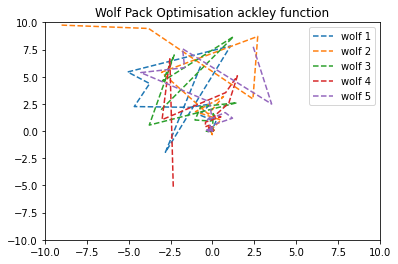

Optimal solution: [-1.66309113e-47  1.54414084e-47]


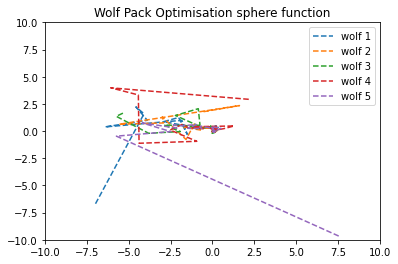

Optimal solution: [ 5.39032286e-49 -3.43025496e-49]


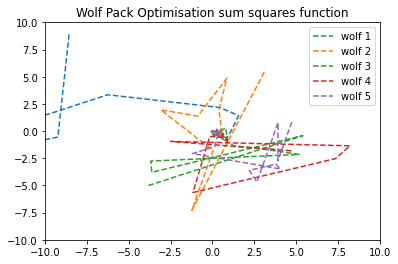

Optimal solution: [0.85928337 3.03399447]


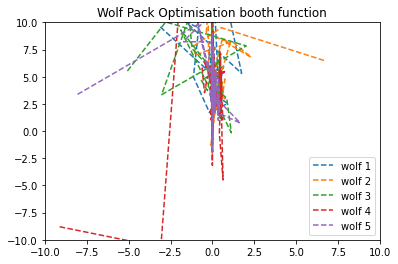

Optimal solution: [0.422075  0.1737144]


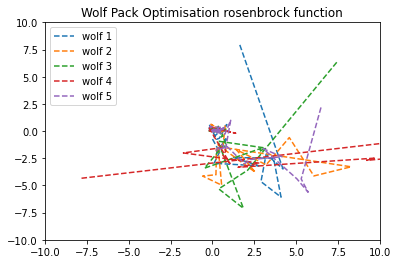

In [14]:
x = [ackley_function,sphere_function,sum_squares_function,booth_function,rosenbrock]
names = ['ackley function','sphere function','sum squares function','booth function','rosenbrock function']
for name in range(len(x)):
    pos, lead = wpa(5, x[name], -10, 10, 2, 1000) # testing Ackley function
    print("Optimal solution:", lead) # printing optimal solution
    for i in range(len(pos[0])):
        plt.plot([x[i][0] for x in pos], [x[i][1] for x in pos], '--', label="wolf "+str(i+1))
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.title("Wolf Pack Optimisation "+names[name])
    plt.legend()
    plt.show()
